# Sensibility Analysis for the Productivity Model


In [22]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
fig_dir = '../../data_analysis/figures/'
import sys
sys.path.append('../../')



In [23]:
sensitivity1

{'sun_protection': None,
 'wbgt': None,
 'impactfunction': None,
 'simulations': None,
 'years': None}

In [26]:
sensitivity1

{'sun_protection': {'RCP85': {2050: {'inside low physical activity': [434341807.9441928,
     434341807.9441928,
     434341807.9441928,
     434341807.9441928,
     434341807.9441928,
     434341807.9441928,
     434341807.9441928,
     434341807.9441928,
     434341807.9441928,
     434341807.9441928],
    'inside moderate physical activity': [205978972.91858178,
     205978972.91858178,
     205978972.91858178,
     205978972.91858178,
     205978972.91858178,
     205978972.91858178,
     205978972.91858178,
     205978972.91858178,
     205978972.91858178,
     205978972.91858178],
    'outside moderate physical activity': [65073824.033812694,
     65073824.033812694,
     65073824.033812694,
     103212522.86475594,
     65073824.033812694,
     65073824.033812694,
     103212522.86475594,
     65073824.033812694,
     65073824.033812694,
     103212522.86475594],
    'outside high physical activity': [141313853.67816773,
     141313853.67816773,
     141313853.67816773,
     429

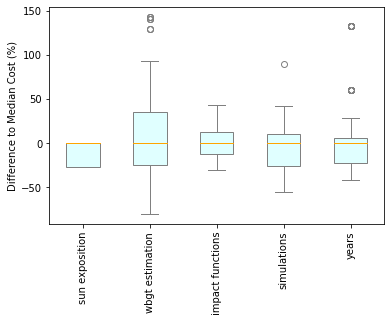

In [50]:
pickle_in =\
open('../../output/productivity_results/sensitivity_100mc_RCP85_2050.pickle','rb')
sensitivity1 = pickle.load(pickle_in)

sensitivity_files = [sensitivity1]

diff_median_dict = {}

c_=1
for sensitivity in sensitivity_files:
#add column with total loss:
    for v_ in sensitivity:
        for s_ in sensitivity[v_]:
            for y_ in sensitivity[v_][s_]: 
                sensitivity[v_][s_][y_]['total'] = np.sum(list(sensitivity[v_][s_][y_].values()), axis=0)
    
    scenarios = ['RCP85']
    y = '2050'
    sensitivity_variables = list(sensitivity.keys())
    sensitivity_variables[1] = 'wbgt estimation'
    sensitivity_variables[0] = 'sun exposition'
    sensitivity_variables[2] = 'impact functions'



    for s_ in scenarios:    
        fig, ax = plt.subplots()
        diff_median = [] #list with the difference to the difference to the median of each run
        for v_ in sensitivity:
            diff_median.append((sensitivity[v_][s_][y_]['total']-np.median(sensitivity[v_][s_][y_]['total']))/np.median(sensitivity[v_][s_][y_]['total'])*100)
            diff_median_dict[v_] = ((sensitivity[v_][s_][y_]['total']-np.median(sensitivity[v_][s_][y_]['total']))/np.median(sensitivity[v_][s_][y_]['total'])*100)
            if v_ != 'simulations':
                c='lightcyan'
                d='Grey'
                box = ax.boxplot(diff_median, patch_artist=True, boxprops=dict(facecolor=c, color=d),
            capprops=dict(color=d),
            whiskerprops=dict(color=d),
            flierprops=dict(color=d, markeredgecolor=d),
            medianprops=dict(color='orange'))

    
        #ax.boxplot(diff_median, patch_artist=True)
        ax.set_xticks([1,2,3,4,5])
        ax.set_ylabel('Difference to Median Cost (%)')

        #colors = ['powderblue' for n in range(len(box)+1)]
 
        #for patch, color in zip(box['boxes'], colors):
        #    patch.set_facecolor(color)
        
        ax.set_xticklabels(sensitivity_variables,rotation=90)
        plt.savefig(''.join([fig_dir,'sensitivity_',s_,'_',y,'.pdf']),bbox_inches='tight')
        c_=c_+1

In [51]:
diff_median

[array([  0.        , -27.80269982, -27.80269982,   0.        ,
          0.        , -27.80269982,   0.        , -27.80269982,
          0.        , -27.80269982,   0.        , -27.80269982,
        -27.80269982,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        , -27.80269982,
        -27.80269982,   0.        , -27.80269982, -27.80269982,
        -27.80269982, -27.80269982, -27.80269982,   0.        ,
          0.        ,   0.        , -27.80269982,   0.        ,
        -27.80269982, -27.80269982, -27.80269982,   0.        ,
        -27.80269982, -27.80269982,   0.        , -27.80269982,
          0.        ,   0.        , -27.80269982,   0.        ,
        -27.80269982,   0.        ,   0.        ,   0.        ,
        -27.80269982, -27.80269982, -27.80269982, -27.80269982,
          0.        , -27.80269982,   0.        , -27.80269982,
        -27.80269982,   0.        ,   0.        , -27.80269982,
        -27.80269982, -27.80269982,   0.

In [53]:
print(np.quantile(diff_median_dict['wbgt'],0.975))
print(np.quantile(diff_median_dict['simulations'],0.975))
print(np.quantile(diff_median_dict['years'],0.975))
print(np.quantile(diff_median_dict['impactfunction'],0.975))

print(np.quantile(diff_median_dict['wbgt'],0.025))
print(np.quantile(diff_median_dict['simulations'],0.025))
print(np.quantile(diff_median_dict['years'],0.025))
print(np.quantile(diff_median_dict['impactfunction'],0.025))



112.1270520552182
41.960607215904936
132.95279237356308
34.872135999249714
-67.53145406655862
-52.236507560206505
-42.390620962255504
-23.861473846931304
